### Car Price Prediction

##### Importing Necessary Packages

In [481]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 

##### Loading the Dataset

In [482]:
data = pd.read_csv('data/car_data.csv')

##### Basic EDA

In [483]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [484]:
data.shape

(301, 9)

In [485]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [486]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [487]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [488]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [489]:
data['Year'].value_counts()

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

In [490]:
data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [491]:
data['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [492]:
data['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [493]:
data['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [494]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [495]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [496]:
data['Selling_Price'].dtype

dtype('float64')

##### Visualization

In [497]:
cat_cols = []
columns = data.columns
for column in columns:
    if data[column].dtype == 'float64':
        continue
    else:
        cat_cols.append(column)

In [498]:
cat_cols.remove('Car_Name')
cat_cols.remove('Kms_Driven')

In [499]:
cat_cols

['Year', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

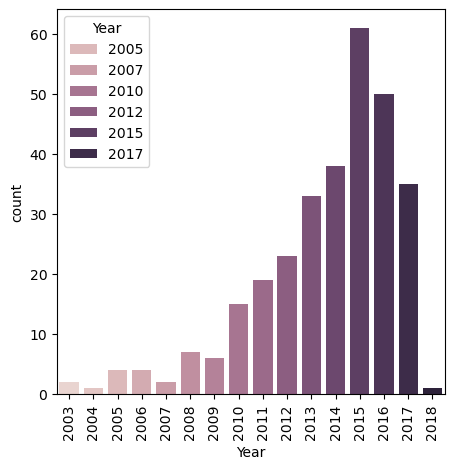

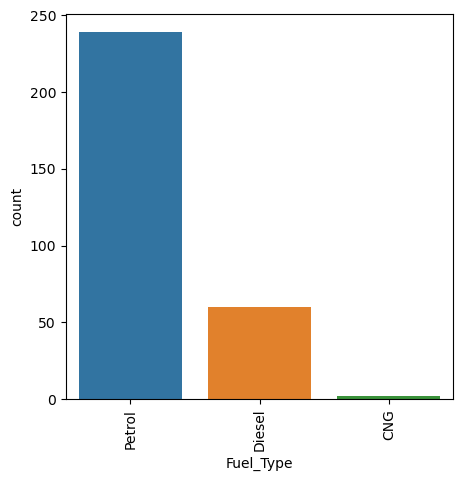

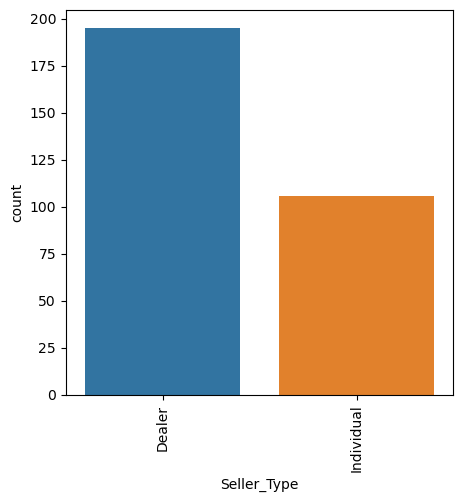

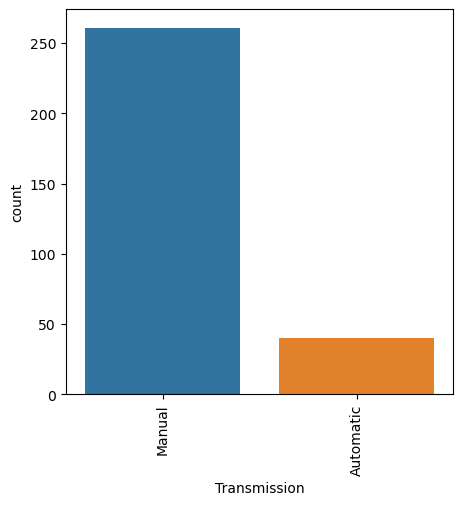

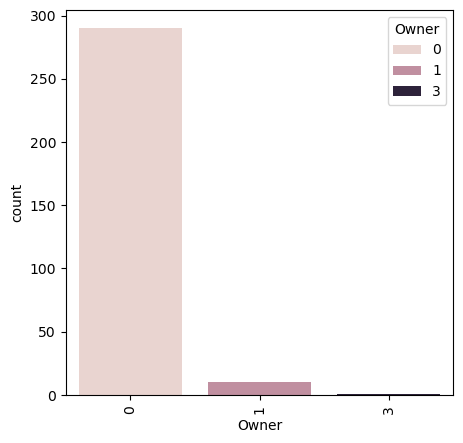

In [500]:
for cat in cat_cols:
    plt.figure(figsize=(5,5))
    sns.countplot(data=data, x=cat, hue=cat)
    plt.xticks(rotation=90)

##### Encoding the Categorical Data

In [501]:
encoder = LabelEncoder()

In [502]:
for cat_col in cat_cols:
    data[cat_col] = encoder.fit_transform(data[cat_col])

In [503]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,11,3.35,5.59,27000,2,0,1,0
1,sx4,10,4.75,9.54,43000,1,0,1,0
2,ciaz,14,7.25,9.85,6900,2,0,1,0
3,wagon r,8,2.85,4.15,5200,2,0,1,0
4,swift,11,4.60,6.87,42450,1,0,1,0


##### Splitting the data into Label and Target

In [504]:
X = data.drop(columns = ['Car_Name', 'Selling_Price'], axis=1)
y = data['Selling_Price']

In [505]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,11,5.59,27000,2,0,1,0
1,10,9.54,43000,1,0,1,0
2,14,9.85,6900,2,0,1,0
3,8,4.15,5200,2,0,1,0
4,11,6.87,42450,1,0,1,0


In [506]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

##### Splitting the data into Training Data and Test Data

In [507]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=12)

In [508]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (255, 7) (46, 7)


In [509]:
print(y.shape, y_train.shape, y_test.shape)

(301,) (255,) (46,)


In [510]:
model = LinearRegression()

In [511]:
model.fit(X_train, y_train)

LinearRegression()

##### Testing Accuracy

In [512]:
training_data_prediction = model.predict(X_train)

In [513]:
accuracy_1 = r2_score(training_data_prediction, y_train)

In [514]:
accuracy_1

0.8752089841341139

In [515]:
testing_data_prediction = model.predict(X_test)

In [516]:
accuracy_2 = r2_score(testing_data_prediction, y_test)

In [517]:
accuracy_2

0.8574731879874561

##### Visualizing the Actual Price and Predicted Price

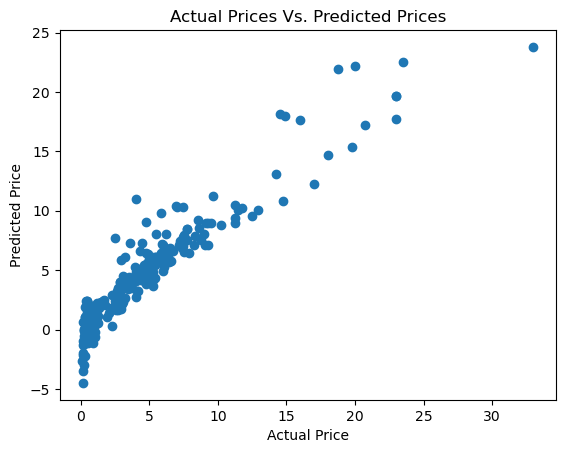

In [518]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs. Predicted Prices")
plt.show()

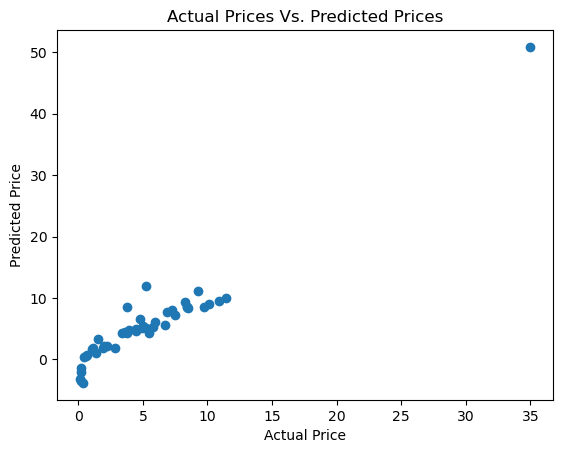

In [519]:
plt.scatter(y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs. Predicted Prices")
plt.show()

##### Lasso Regression

In [520]:
lasso = Lasso()

In [521]:
lasso.fit(X_train, y_train)

Lasso()

In [522]:
training_data_prediction_lasso = lasso.predict(X_train)

In [523]:
accuracy_3 = r2_score(training_data_prediction_lasso, y_train)

In [524]:
accuracy_3

0.836241858692329

In [525]:
testing_data_prediction_lasso = lasso.predict(X_test)

In [526]:
accuracy_4 = r2_score(testing_data_prediction_lasso, y_test)

In [527]:
accuracy_4

0.8250825841862824

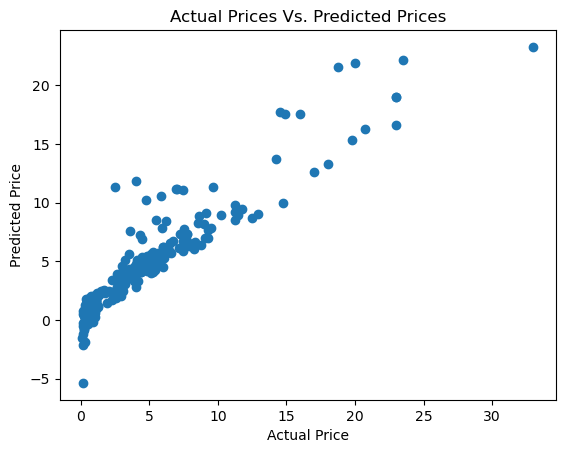

In [528]:
plt.scatter(y_train, training_data_prediction_lasso)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs. Predicted Prices")
plt.show()

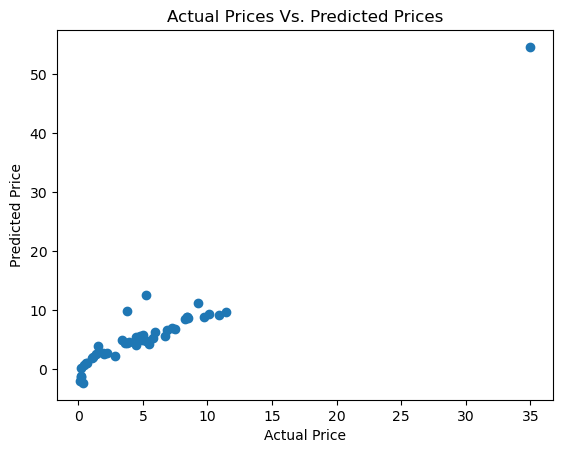

In [529]:
plt.scatter(y_test, testing_data_prediction_lasso)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs. Predicted Prices")
plt.show()